In [1]:
import numpy as np
import pandas as pd
import xarray as xr
from tqdm import tqdm
import gc
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import matplotlib.ticker as mticker
import matplotlib.colors as colors
import numpy.ma as ma
import statsmodels.api as sm
from scipy import stats
import seaborn as sns
import time

def open_nc(path,scale=1.0):
    ds=(xr.open_dataset(path)*scale)
    ds=ds.assign_coords(lon=(((ds.lon + 180) % 360) - 180))
    ds=ds.reindex(lon=sorted(ds.lon))  
    return ds

method_ls = ["MAM4","ML","diff"]
chi_ls = ["chi_b","chi_c","chi_h"]

file_path = {}
file_path["MAM4"] = "/data/keeling/a/zzheng25/d/mam4_paper_data/chi_only/mam4_chi/"
file_path["ML"] = "/data/keeling/a/zzheng25/d/mam4_paper_data/chi_only/ml_chi/"
file_path["diff"] = "/data/keeling/a/zzheng25/d/mam4_paper_data/chi_only/mam4_minus_ml_chi/"
mask_path = "/data/keeling/a/zzheng25/d/mam4_paper_data/chi_only/mask/"

name_ls = {}
name_ls["chi_h"]=r'$\overline{\chi_{\rm{h}}}$ (%)'
name_ls["chi_b"]=r'$\overline{\chi_{\rm{o}}}$ (%)'
name_ls["chi_c"]=r'$\overline{\chi_{\rm{c}}}$ (%)'

char_ls="abcdefghijklmnop"

rc={'axes.labelsize':12, 'font.size':12, 'legend.fontsize':12, 'axes.titlesize':12}
plt.rcParams.update(**rc)

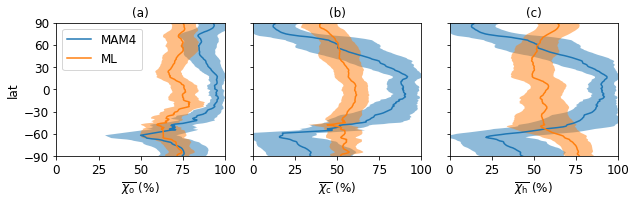

In [2]:
year = "2011"

fig = plt.figure(figsize=(9,3))
i = 1
title_ls = ["(a)","(b)","(c)"]

for chi in chi_ls:
    ax = plt.subplot(1,3,i)
    mask = open_nc(mask_path+str(year)+"_"+chi+".nc")["mask"]
    MAM4 = open_nc(file_path["MAM4"]+str(year)+"_"+chi+"_mean.nc",scale=100.0)[chi]\
          .where(mask).mean(dim="lon").to_dataframe()\
          .reset_index().dropna()[["lat",chi]]
    ML = open_nc(file_path["ML"]+str(year)+"_"+chi+"_mean.nc",scale=100.0)[chi]\
          .where(mask).mean(dim="lon").to_dataframe()\
          .reset_index().dropna()[["lat",chi]]
    
    MAM4_std = open_nc(file_path["MAM4"]+str(year)+"_"+chi+"_std.nc",scale=100.0)[chi]\
          .where(mask).mean(dim="lon").to_dataframe()\
          .reset_index().dropna()[["lat",chi]]
    ML_std = open_nc(file_path["ML"]+str(year)+"_"+chi+"_std.nc",scale=100.0)[chi]\
          .where(mask).mean(dim="lon").to_dataframe()\
          .reset_index().dropna()[["lat",chi]]
    
    ax.plot(MAM4[chi],MAM4["lat"],label="MAM4")
    ax.fill_betweenx(MAM4["lat"], MAM4[chi]-MAM4_std[chi], MAM4[chi]+MAM4_std[chi],alpha=0.5)    
    
    ax.plot(ML[chi],ML["lat"],label="ML")
    ax.fill_betweenx(ML["lat"], ML[chi]-ML_std[chi], ML[chi]+ML_std[chi],alpha=0.5) 
    ax.set_yticks([-90,-60,-30,0,30,60,90])
    if chi=="chi_b":
        plt.legend()
        ax.set_ylabel("lat")
    else:
        ax.set_yticklabels([])
    ax.set_xlim(0,100)
    ax.set_ylim(-90,90)
    ax.set_xlabel(name_ls[chi])
    ax.set_title(title_ls[i-1])
    i+=1
plt.tight_layout()
fig.savefig("../figures/lat_chi.pdf")
plt.show()